In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
covid_data_dir_0 = r'data/raw/DOH COVID Data Drop_ 20220521 - 04 Case Information_batch_0.csv'
covid_data_dir_1 = r'data/raw/DOH COVID Data Drop_ 20220521 - 04 Case Information_batch_1.csv'
covid_data_dir_2 = r'data/raw/DOH COVID Data Drop_ 20220521 - 04 Case Information_batch_2.csv'
covid_data_dir_3 = r'data/raw/DOH COVID Data Drop_ 20220521 - 04 Case Information_batch_3.csv'

bnd_data_dir = r'data/processed/merge.shp'

In [3]:
df_covid_0 = pd.read_csv(covid_data_dir_0)
df_covid_1 = pd.read_csv(covid_data_dir_1)
df_covid_2 = pd.read_csv(covid_data_dir_2)
df_covid_3 = pd.read_csv(covid_data_dir_3)

df_bnd = gpd.read_file(bnd_data_dir)

/tmp/ipykernel_32603/3910334582.py:1: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_covid_0 = pd.read_csv(covid_data_dir_0)
/tmp/ipykernel_32603/3910334582.py:4: DtypeWarning: Columns (7,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_covid_3 = pd.read_csv(covid_data_dir_3)


In [4]:
df_covid = pd.concat([df_covid_0,df_covid_1,df_covid_2,df_covid_3],axis=0)

<AxesSubplot:xlabel='DateRepConf'>

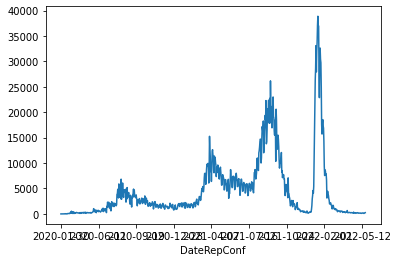

In [5]:
df_covid.groupby('DateRepConf').CaseCode.count().plot()

In [6]:
# subset to delta surge
df_covid['DateRepConf'] = pd.to_datetime(df_covid.DateRepConf)

delta_subset = df_covid.loc[(df_covid.DateRepConf>=pd.to_datetime('2021-07-01')) & 
                            (df_covid.DateRepConf<=pd.to_datetime('2021-10-31'))]

<AxesSubplot:xlabel='DateRepConf'>

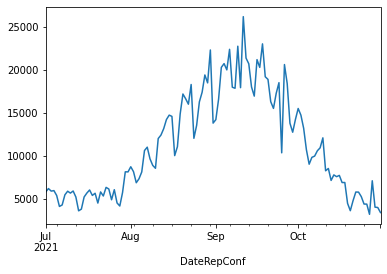

In [7]:
delta_subset.groupby('DateRepConf').CaseCode.count().plot()

In [8]:
delta_subset.head(1)

CaseCode   Age  AgeGroup   Sex DateSpecimen DateResultRelease  \
409983  C10870550  14.0  10 to 14  MALE   2021-06-29        2021-06-29   

       DateRepConf DateDied DateRecover RemovalType  ...  ProvRes CityMunRes  \
409983  2021-07-01      NaN         NaN   RECOVERED  ...  ANTIQUE    ANINI-Y   

       CityMuniPSGC BarangayRes BarangayPSGC HealthStatus Quarantined  \
409983  PH060601000   SALVACION  PH060601019    RECOVERED         YES   

         DateOnset Pregnanttab  \
409983  2021-06-29         NaN   

                                         ValidationStatus  
409983  Removal Type is "Recovered", but no Recovered ...  

[1 rows x 22 columns]

In [9]:
base = delta_subset.groupby(['BarangayPSGC','DateRepConf']).CaseCode.count().reset_index().sort_values('CaseCode')

In [10]:
aug15 = base.loc[base.DateRepConf == pd.to_datetime('2021-08-15')]

In [11]:
aug15.head(1)

BarangayPSGC DateRepConf  CaseCode
297925  PH071238014  2021-08-15         1

In [12]:
sample = df_bnd.merge(aug15, left_on='Bgy_Code', right_on='BarangayPSGC', how='inner')

In [13]:
sample['DateRepConf'] = sample.DateRepConf.astype('str')

In [14]:
sample.to_file(r'data/processed/delta_aug15_bgy.shp')

/tmp/ipykernel_32603/553248187.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  sample.to_file(r'data/processed/delta_aug15_bgy.shp')


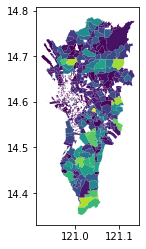

In [33]:
sample.loc[sample.Reg_Code=='PH130000000'].plot(column='CaseCode').get_figure().savefig('aug15.png')

In [40]:
mm_bnd = df_bnd.loc[df_bnd.Reg_Code=='PH130000000']

In [ ]:
# compute cumulative cases per barangay per date

/home/gab/Desktop/covid-bgy-time-slider/covid-bgy-geoprocess/venv/lib/python3.10/site-packages/geopandas/plotting.py:661: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


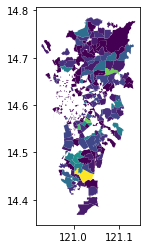

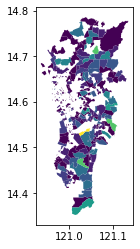

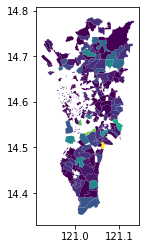

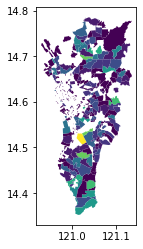

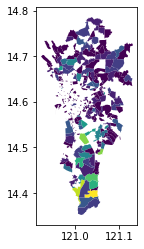

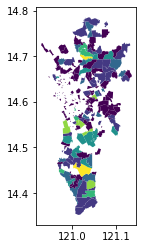

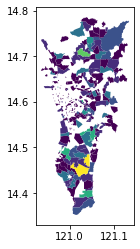

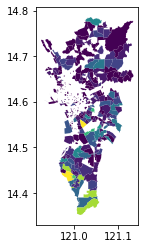

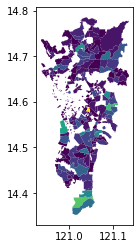

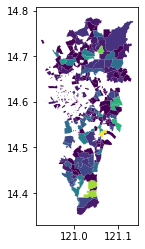

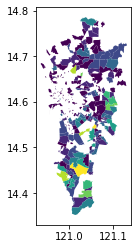

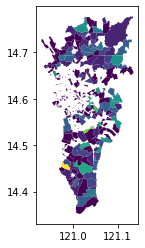

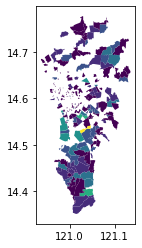

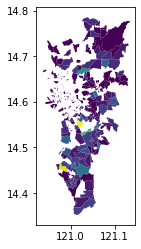

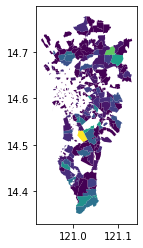

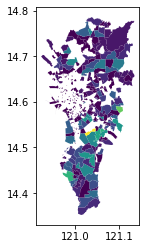

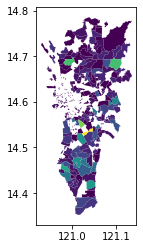

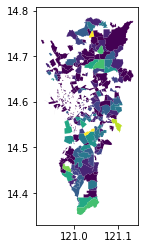

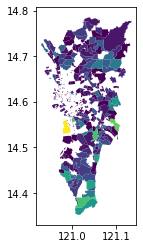

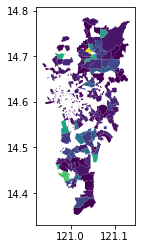

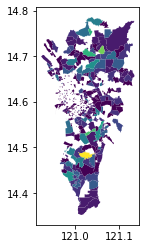

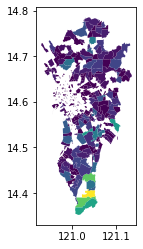

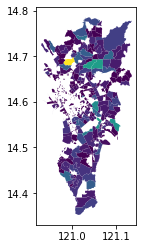

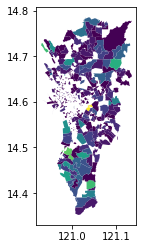

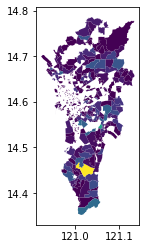

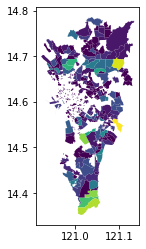

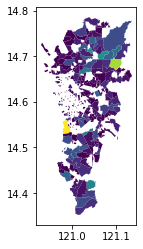

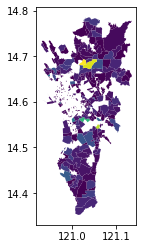

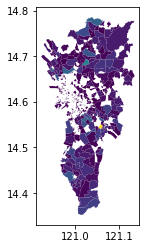

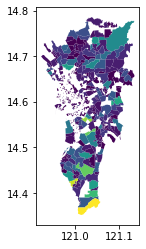

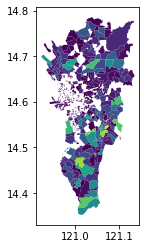

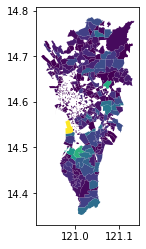

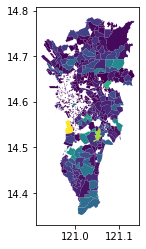

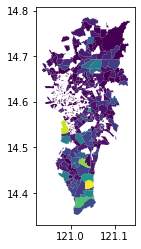

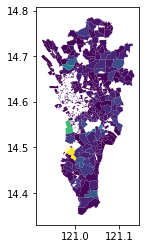

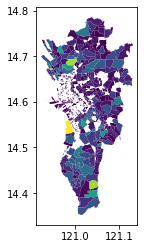

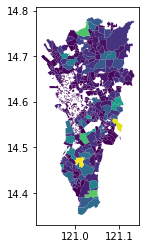

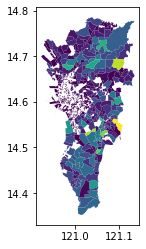

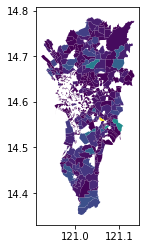

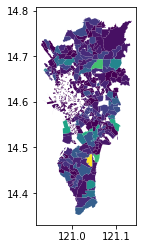

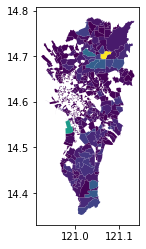

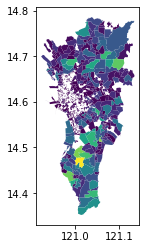

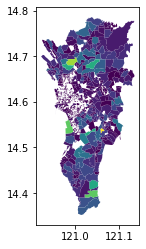

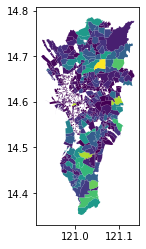

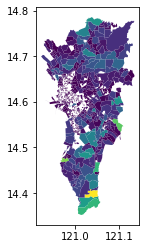

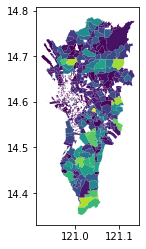

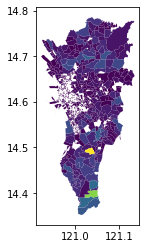

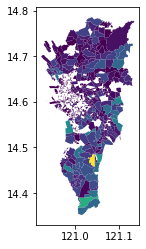

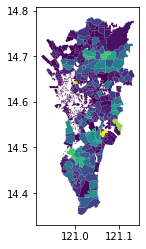

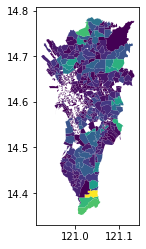

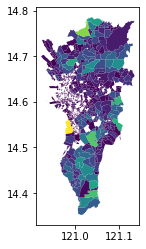

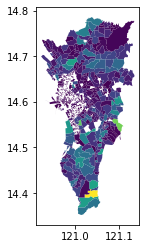

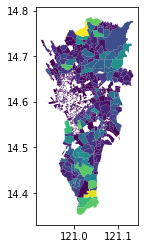

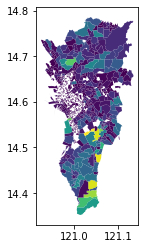

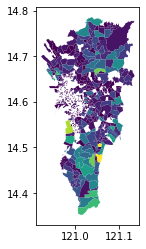

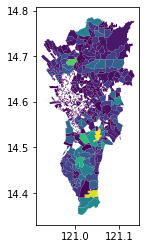

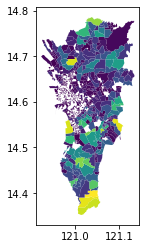

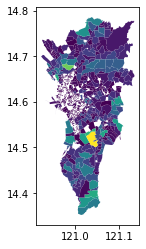

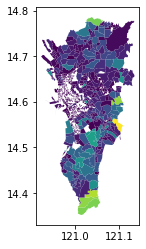

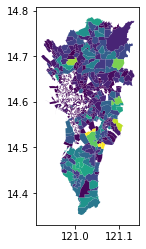

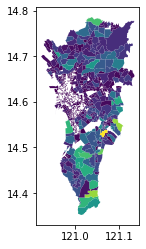

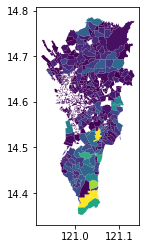

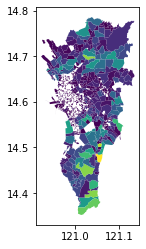

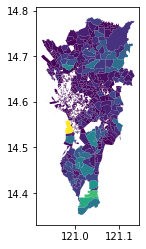

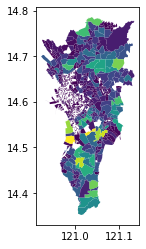

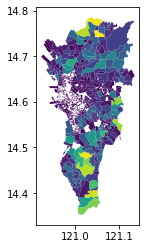

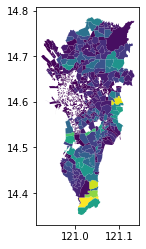

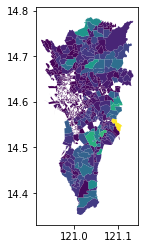

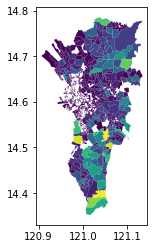

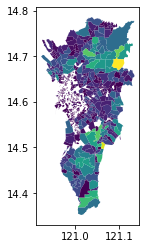

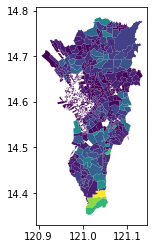

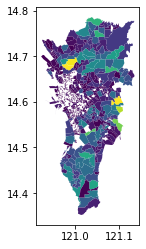

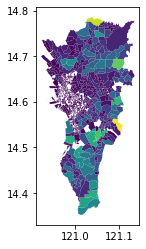

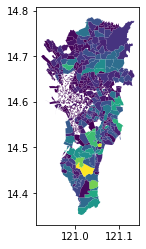

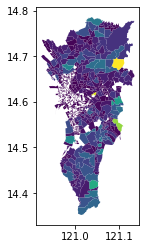

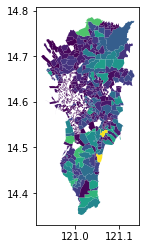

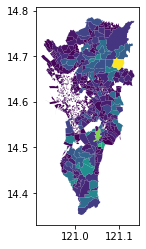

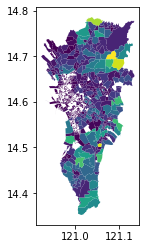

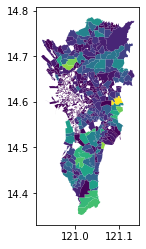

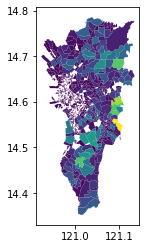

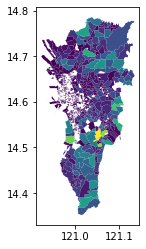

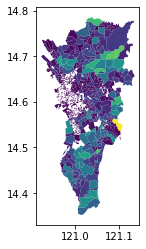

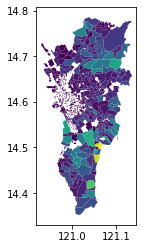

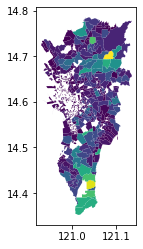

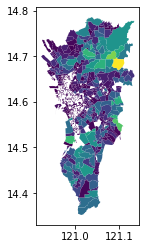

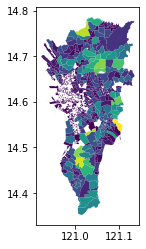

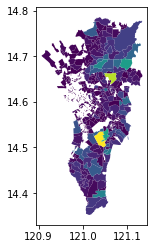

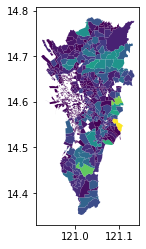

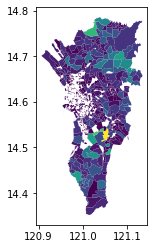

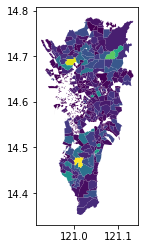

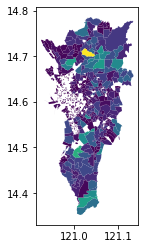

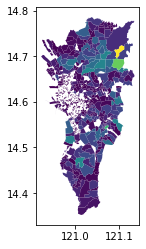

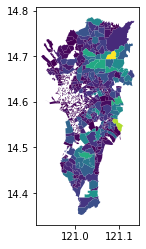

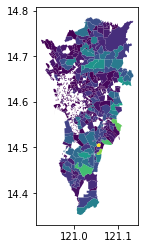

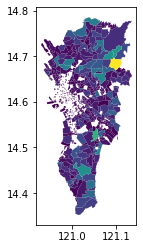

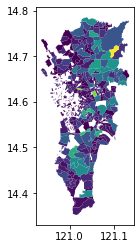

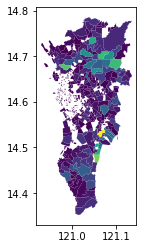

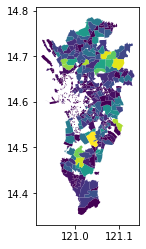

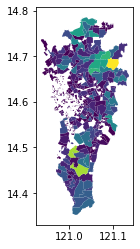

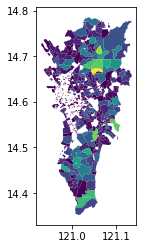

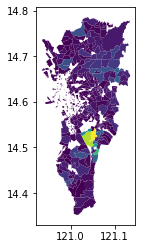

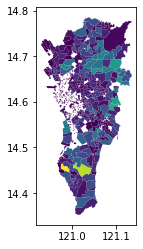

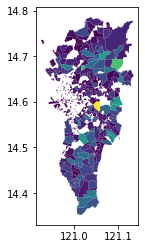

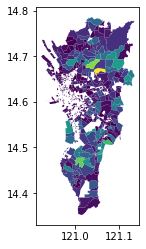

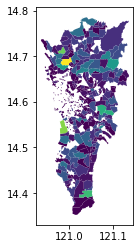

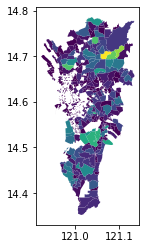

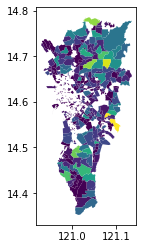

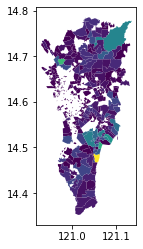

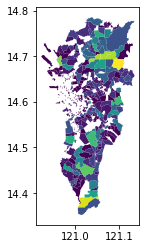

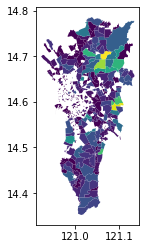

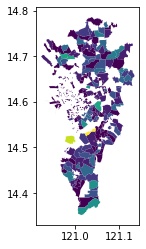

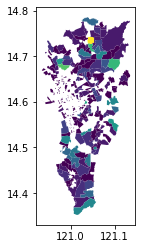

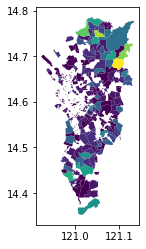

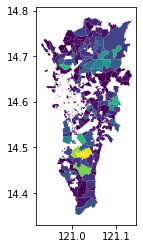

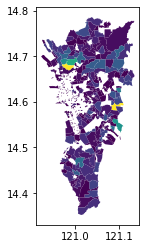

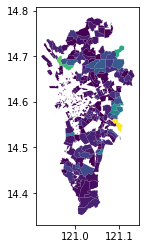

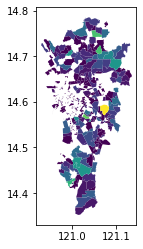

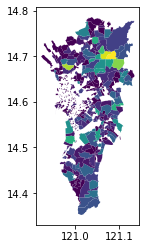

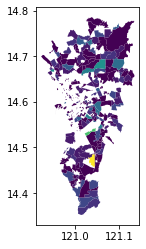

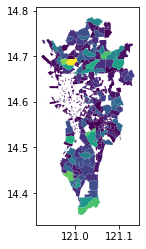

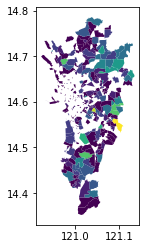

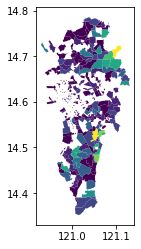

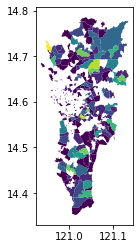

In [50]:
for i,date in enumerate(base['DateRepConf'].sort_values().unique()):
    seg = base.loc[base.DateRepConf==date]
    a = mm_bnd.merge(seg, left_on='Bgy_Code', right_on='BarangayPSGC', how='inner')
    a.plot(column='CaseCode').get_figure().savefig(f"{date}.png")